In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# Remember, the windows are the INVERSE of the absorption features
# Next - build ability to choose seed (both in make_specs and empca)

Populating the interactive namespace from numpy and matplotlib


test_empca.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if proportion == 'real':

       iter        R2             rchi2
EMPCA  1/25       0.00542940      0.00006271
EMPCA  2/25       0.04107501      0.00006046
EMPCA  3/25       0.05741007      0.00005943
EMPCA  4/25       0.05976840      0.00005928
EMPCA  5/25       0.06122068      0.00005919
R2: 0.0621135673793
       iter        R2             rchi2
EMPCA  1/25       0.00403308      1.07259477
EMPCA  2/25       0.03453439      1.01925715
EMPCA  3/25       0.04857499      0.99764712
EMPCA  4/25       0.04913322      0.99713464
R2: 0.0493060849613
[ 0.          0.03014135  0.03163443  0.03293449  0.03451369  0.03603775] [ 0.          0.03102897  0.03333478  0.03579631  0.03751593  0.03999989]
var, Vnoise  6.25454201506e-05 6.00855053176e-05
       iter        R2             rchi2
EMPCA  1/25       0.25632538      0.00001174
EMPCA  2/25       0.6

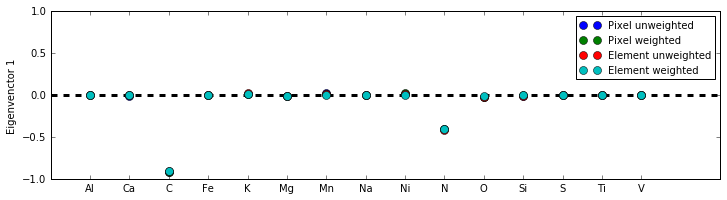

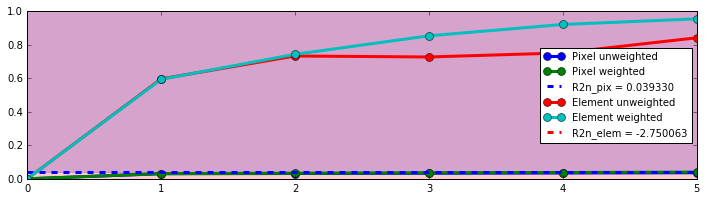

In [3]:
run test_empca -i 1

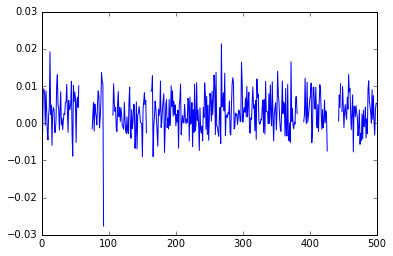

In [232]:
dum = plt.plot(falsespecs[0][np.where(elemwindows['C']!=0)])

In [20]:
 m1,m2,w1,w2 = pix_empca(None,falsespecs.T,noise,'test.pkl',nvecs=5,deltR2=2e-3,gen=True,usemad=False,randseed=1)

In [21]:
m1

In [23]:
m2.R2(0)

0.0

In [2]:
run run_empca -vugp -m red_clump/pickles/models/model_FE_H_u-0.1_d-0.105.pkl -d 2e-3 -n 14

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
/home/price-jones/Code/apogee/apogee/spec/window.py:88: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True-numpy.isnan(win))).astype('int')


KeyboardInterrupt: 

In [3]:
run run_residuals -vx -i FE_H -u -0.1 -d -0.105 -s red_clump -c None -l 50,200

/usr/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Initialization runtime 1.81 s
Number of stars 194

Nonzero Minimum SNR before mask 0.0012
Maximum SNR before correction 219.82
SNR cut runtime 0.04 s
Minimum SNR after mask 50.0025
Maximum SNR after correction 200.00

SNR correction runtime 0.01 s

Bitmask application runtime 0.06 s

Pixel residuals runtime 130.73 s
Maximum residual 0.189782471534 

Finding random sigma runtime 1.17 s



In [4]:
import access_spectrum as acs
model = acs.pklread('red_clump/pickles/models/model_FE_H_u-0.1_d-0.105.pkl')
elems = ['Al','Ca','C','Fe','K','Mg','Mn','Na','Ni','N','O','Si','S','Ti','V']
aspcappix = 7214

In [5]:
def randomize_residual(residual,uncertainty):
    return uncertainty.T*np.random.randn(residual.shape[0],residual.shape[1])+residual

def weight(residual,numstars,model):
    weighted = np.ma.masked_array(np.zeros((len(elems),numstars)))
    i=0
    for elem in elems:
        weighted[i] = model.weighting_stars(residual,elem)
        i+=1
    return weighted

In [6]:
iters=1000
randoms = np.ma.masked_array(np.zeros((iters,len(elems),model.numstars)))
rands = np.ma.masked_array(np.zeros((iters,aspcappix,model.numstars)))
for i in range(iters):
    rand_resid = randomize_residual(model.residual,model.errs)
    rands[i] = rand_resid
    randoms[i] = weight(rand_resid,model.numstars,model)

NameError: global name 'name' is not defined

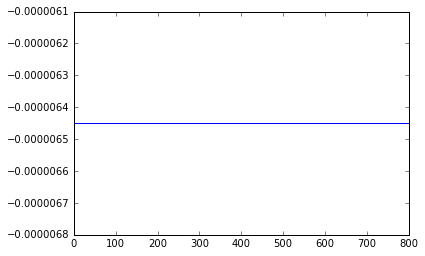

In [17]:
plt.plot(randoms[200:,14,0])

In [155]:
stds_pix = np.ma.masked_array(np.zeros((aspcappix,model.numstars)))
for i in range(aspcappix):
    pix_rands = rands[:,i]
    stds_pix[i] = np.ma.std(pix_rands,axis=0)
stds_pix.mask = model.errs.T.mask
diff_pix = model.errs.T - stds_pix

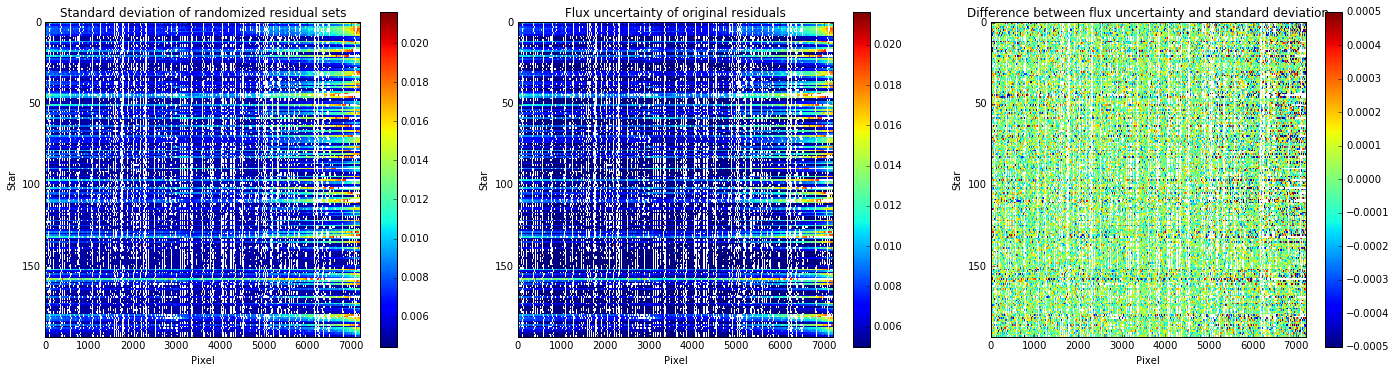

In [156]:
plt.figure(figsize=(24,6))
plt.subplot2grid((1,3),(0,0))
plt.imshow(stds_pix.T,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest')
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Standard deviation of randomized residual sets')
plt.colorbar()
plt.subplot2grid((1,3),(0,1))
plt.imshow(model.errs,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest')
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Flux uncertainty of original residuals')
plt.colorbar()
plt.subplot2grid((1,3),(0,2))
plt.imshow(diff_pix.T,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest',vmin=-5e-4,vmax=5e-4)
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Difference between flux uncertainty and standard deviation')
plt.colorbar()


In [157]:
stds_elem = np.zeros((len(elems),model.numstars))
for i in range(len(elems)):
    elem_rands = randoms[:,i]
    stds_elem[i] = np.ma.std(elem_rands,axis=0)
diff_elem = errs - stds_elem

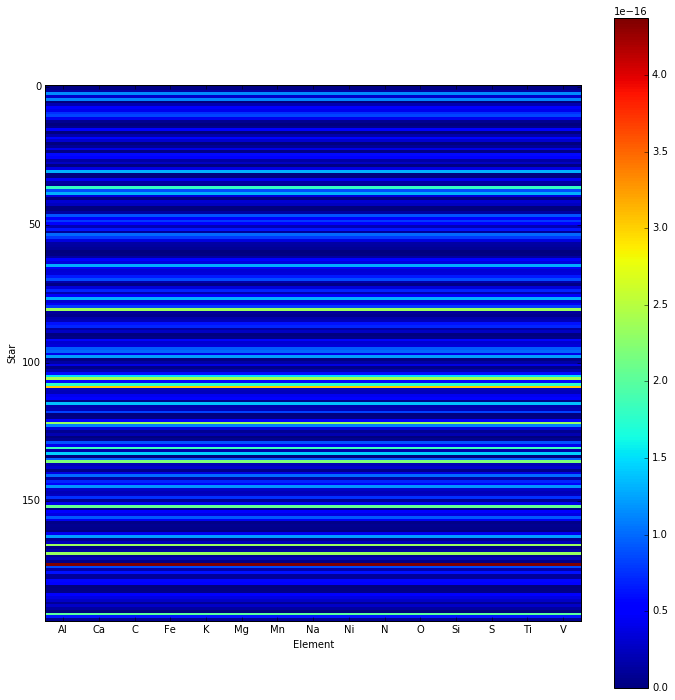

In [158]:
stds_elem = stds_elem.T
plt.figure(figsize=(12,12))
plt.imshow(stds_elem,aspect = float(stds_elem.shape[1])/stds_elem.shape[0],interpolation='nearest')
plt.ylabel('Star')
plt.xlabel('Element')
plt.xticks(range(len(elems)),elems)
plt.colorbar()

In [159]:
argument=model.data['TEFF']>4500

In [160]:
argument

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [170]:
model.getData()

In [173]:
import apogee.tools.read as apread
test = apread.rcsample()

In [190]:
test.dtype

dtype([('APSTAR_ID', 'S45'), ('ASPCAP_ID', 'S44'), ('APOGEE_ID', 'S18'), ('TELESCOPE', 'S8'), ('LOCATION_ID', '>i2'), ('FIELD', 'S16'), ('J', '>f4'), ('J_ERR', '>f4'), ('H', '>f4'), ('H_ERR', '>f4'), ('K', '>f4'), ('K_ERR', '>f4'), ('RA', '>f8'), ('DEC', '>f8'), ('GLON', '>f8'), ('GLAT', '>f8'), ('APOGEE_TARGET1', '>i4'), ('APOGEE_TARGET2', '>i4'), ('TARGFLAGS', 'S116'), ('NVISITS', '>i4'), ('COMMISS', '>i2'), ('SNR', '>f4'), ('STARFLAG', '>i4'), ('STARFLAGS', 'S129'), ('ANDFLAG', '>i4'), ('ANDFLAGS', 'S59'), ('VHELIO_AVG', '>f4'), ('VSCATTER', '>f4'), ('VERR', '>f4'), ('VERR_MED', '>f4'), ('STABLERV_CHI2', '>f4', (2,)), ('STABLERV_RCHI2', '>f4', (2,)), ('STABLERV_CHI2_PROB', '>f4', (2,)), ('EXTRATARG', '>i2'), ('PARAM', '>f4', (7,)), ('FPARAM', '>f4', (7,)), ('PARAM_COV', '>f4', (7, 7)), ('FPARAM_COV', '>f4', (7, 7)), ('ELEM', '>f4', (15,)), ('FELEM', '>f4', (15,)), ('ELEM_ERR', '>f4', (15,)), ('FELEM_ERR', '>f4', (15,)), ('TEFF', '>f4'), ('LOGG', '>f4'), ('PARAM_M_H', '>f4'), ('PARAM

In [216]:
class dogInfo(object):
    def __init__(self,name,age,arr):
        self.name = name
        self.age = age
        self.arr = arr

In [217]:
names = ['Larry','Curly','Moe']
ages = [10,4,7]
arrs = [np.arange(1,5),np.arange(1,5)+1,np.arange(1,5)+2]

In [218]:
dogs = []
for i in range(len(names)):
    dogs.append(dogInfo(names[i],ages[i],arrs[i]))

In [199]:
dogs

In [205]:
[dogs[i].name for i in range(len(dogs))]

['Larry', 'Curly', 'Moe']

In [206]:
moe = dogs[-1]

In [215]:
(test['TEFF'] > 4500) & (test['TEFF'] < 4600)

array([False, False, False, ..., False, False, False], dtype=bool)

In [220]:
np.array([dogs[i].arr for i in range(len(dogs))])

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])